## CNN

**STEPS INVOLVED:**
1. Import the libraries
2. Image Processing and Data Augmentation
3. Initialize the model
4. Add Convolution Layer _(image size, how many feature detectors, size of featire detectors)_
5. Add Pooling Layer
6. Add Flatten Layer
7. Add I/P layer
8. Add Hidden Layers
9. Add O/P Layer
10. Compile the process
11. Train the data
12. Save the model
13. Test the model

**HOW TO MAKE A DATASET?**
1. ***Make a main folder for categorical o/p***

> Inside it, _Test Folder_ :

> _Train Folder_ :

2. ***Make a main folder for classification o/p***

> _Test Set_: 

> _Train set_: 

3. ___Higher the images, higher the accuracy___

## 1. Import Libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten, Dropout

## 2. Image Preprocessing
> **Augmenting** the images by applying some more featires and rescaling it.

> ___Augmentation:___ In order to make the training more accurate, train the images from different angles. **Rescaling** the images

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rescale - scaling the images into a single range
# Here, the image is getting zoomed and flipped
# shear_range - the image can be stretched either in the s or y direction (stretched images)

train_datagen = ImageDataGenerator (rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator (rescale = 1./255)

In [3]:
# Since all the images are of different sizes, we make them of similar sizes using target_size
# batch size indicates the number of images whihc will be trained in a batch

x_train = train_datagen.flow_from_directory(r'C:\Users\mohan\OneDrive\Desktop\Pokemon_Classification Data\trainset', target_size = (64,64),batch_size = 32,class_mode = "categorical"
)
x_test = test_datagen.flow_from_directory(r'C:\Users\mohan\OneDrive\Desktop\Pokemon_Classification Data\testset', target_size = (64,64),batch_size = 32,class_mode = "categorical"
)

Found 883 images belonging to 18 classes.
Found 446 images belonging to 18 classes.


In [4]:
x_train.class_indices

{'Bug': 0,
 'Dark': 1,
 'Dragon': 2,
 'Electric': 3,
 'Fairy': 4,
 'Fighting': 5,
 'Fire': 6,
 'Flying': 7,
 'Ghost': 8,
 'Grass': 9,
 'Ground': 10,
 'Ice': 11,
 'Normal': 12,
 'Poison': 13,
 'Psychic': 14,
 'Rock': 15,
 'Steel': 16,
 'Water': 17}

## 3. Initialize the model

In [5]:
model = Sequential()

## 4. Add Convolutional Layer

In [6]:
# no of feature detectors = 32
# size of feature detectors = (3,3)
# image size = 64, 64
# 3 indicates RGB (3 channels) for colored images

model.add(Convolution2D(32, (3,3), input_shape = (64,64,3)))

## 5. Add Pooling Layer

In [7]:
# Add pool size, the conventional size is 2 by 2

model.add(MaxPooling2D ((2,2)))

In [8]:
# Add another convolution layer
model.add(Convolution2D(32, (3,3), input_shape = (64,64,3)))

In [9]:
# Adding another max pool for the above convolution layer
model.add(MaxPooling2D ((2,2)))

## 6. Add Flatten/Input Layer

In [10]:
model.add(Flatten())

## 7. Add Hidden Layers

In [11]:
model.add(Dense(units = 128, kernel_initializer = "random_uniform", activation ="relu"))

In [12]:
# Randomly turn neurons on and off to improve convergence
# Add dropout layer
model.add(Dropout(0.3)) 

In [13]:
model.add(Dense(units = 128, kernel_initializer = "random_uniform", activation ="relu"))

In [14]:
# Add another Dropout layer
model.add(Dropout(0.3))

In [15]:
model.add(Dense(units = 128, kernel_initializer = "random_uniform", activation ="relu"))

In [16]:
model.add(Dropout(0.3))

## 8. Add Ouput Layer

In [17]:
model.add(Dense(units = 18, kernel_initializer = "random_uniform", activation ="softmax"))

## 9. Compile the Process

In [18]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

> steps per epoch is the number of images the model is trained on -> **number of images in train set / batch size** = 883/32

> validation steps is the no of images the model tests upon -> no of **images in test set / batch size** = 446/32

In [19]:
# Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

## 10. Train the data

In [20]:
 
hist = model.fit_generator(x_train,steps_per_epoch = 20 , epochs = 500 , validation_data = x_test, validation_steps = 8,callbacks=[early_stop])

C:\Users\mohan\AppData\Local\Temp/ipykernel_16508/670391228.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(x_train,steps_per_epoch = 20 , epochs = 500 , validation_data = x_test, validation_steps = 8,callbacks=[early_stop])
C:\Users\mohan\anaconda3\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/500
20/20 [==============================] - 10s 435ms/step - loss: 2.7669 - accuracy: 0.1356 - val_loss: 2.7667 - val_accuracy: 0.1250
Epoch 2/500
20/20 [==============================] - 5s 260ms/step - loss: 2.6644 - accuracy: 0.1579 - val_loss: 2.7355 - val_accuracy: 0.1406
Epoch 3/500
20/20 [==============================] - 4s 212ms/step - loss: 2.6727 - accuracy: 0.1643 - val_loss: 2.7620 - val_accuracy: 0.1172
Epoch 4/500
20/20 [==============================] - 4s 199ms/step - loss: 2.6635 - accuracy: 0.1451 - val_loss: 2.7317 - val_accuracy: 0.1484
Epoch 5/500
20/20 [==============================] - 4s 209ms/step - loss: 2.6504 - accuracy: 0.1437 - val_loss: 2.7396 - val_accuracy: 0.1172
Epoch 6/500
20/20 [==============================] - 4s 205ms/step - loss: 2.6296 - accuracy: 0.1627 - val_loss: 2.7372 - val_accuracy: 0.1367
Epoch 7/500
20/20 [==============================] - 4s 203ms/step - loss: 2.6371 - accuracy: 0.1611 - val_loss: 2.7023 - val_accuracy: 0.132

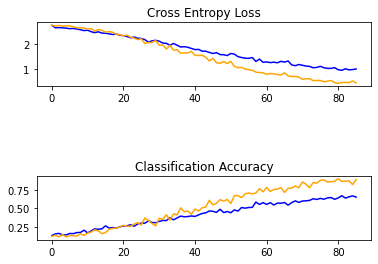

In [21]:
# Plotting
import matplotlib.pyplot as plt

# plot loss
plt.subplot(3,1,1)
plt.title('Cross Entropy Loss')
plt.plot(hist.history['loss'], color='blue', label='train')
plt.plot(hist.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(3,1,3)
plt.title('Classification Accuracy')
plt.plot(hist.history['accuracy'], color='blue', label='train')
plt.plot(hist.history['val_accuracy'], color='orange', label='test')

## 11. Save the model

In [22]:
model.save('pokemonModel.h5')

## 12. Test the model
1. Import libraries
2. Load the model
3. Load the image
4. Convert the image to CNN architecture
5. Predict the image

### a. Import Libraries

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

### b. Load the model

In [24]:
model = load_model ("pokemonModel.h5")

### c. Load the image

In [25]:
img = image.load_img("accelgor.png", target_size=(64,64))

### d. Convert the image to CNN architecture

In [26]:
# type of image is still image
type(img)

PIL.Image.Image

> ***We have to convert the image type to array***

In [27]:
x = image.img_to_array(img)

In [28]:
x.shape

(64, 64, 3)

> **For CNN, the x_shape should be of 4 dimensions**, thus we must expand the x_shape from 3 to 4 dimensions

In [29]:
import numpy as np
x = np.expand_dims(x, axis = 0)

In [30]:
x.shape

(1, 64, 64, 3)

### e. Predict the image

In [31]:
pred = np.argmax(model.predict(x))
pred

0

In [32]:
index = ['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy' , 'Fighting' , 'Fire' , 'Flying' , 'Ghost' , 'Grass' , 'Ground' , 'Ice' , 'Normal' , 'Poison' , 'Psychic' , 'Rock' , 'Steel' , 'Water' ]
prediction = index[pred]
prediction

'Bug'